# Transformation des images en données numériques 

In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mahotas



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ -----------------------

In [3]:
pip install --upgrade scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -----------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.35.0 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.


# Importation des librairies

In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
import numpy as np
from skimage.util import view_as_windows


# Chargement de l'image en niveaux gris et visualisation

GIF converti avec succès en JPEG : C:/Users/HP/Documents/quatriemeannee/machinelearning/data/raw/img/Benign_Cases/92_751.jpg


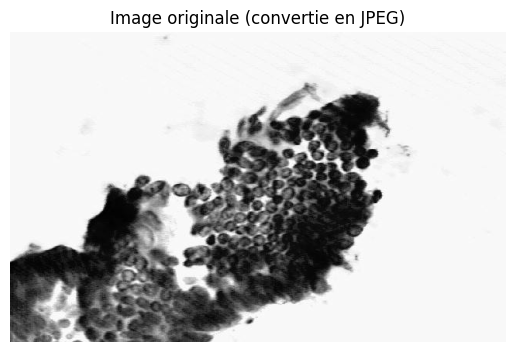

In [9]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os

# Chemin de l'image GIF
gif_path = "C:/Users/HP/Documents/quatriemeannee/machinelearning/data/raw/img/Benign_Cases/92_751.gif"
jpeg_path = "C:/Users/HP/Documents/quatriemeannee/machinelearning/data/raw/img/Benign_Cases/92_751.jpg"

# Vérifiez si le GIF existe
if not os.path.exists(gif_path):
    print(f"Erreur : Le fichier {gif_path} n'existe pas.")
else:
    # Conversion du GIF en JPEG
    try:
        with Image.open(gif_path) as img:
            img = img.convert("RGB")  # Convertir en mode RGB pour le format JPEG
            img.save(jpeg_path, "JPEG")
        print(f"GIF converti avec succès en JPEG : {jpeg_path}")
    except Exception as e:
        print(f"Erreur lors de la conversion du GIF en JPEG : {e}")

    # Charger l'image JPEG convertie avec OpenCV
    image = cv2.imread(jpeg_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Erreur : Impossible de charger l'image depuis {jpeg_path}.")
    else:
        # Visualisation
        plt.imshow(image, cmap='gray')
        plt.title("Image originale (convertie en JPEG)")
        plt.axis('off')
        plt.show()


# Filtrage pour réduire le bruit

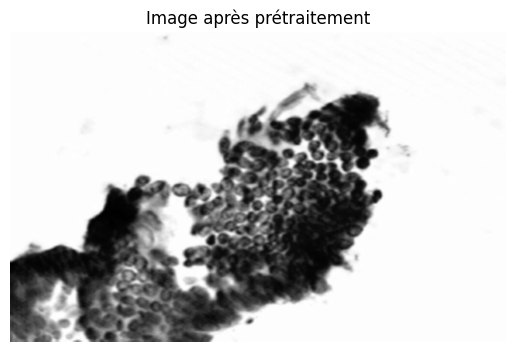

In [10]:
# Filtrage pour réduire le bruit
image_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Augmenter le contraste (normalisation)
image_norm = cv2.normalize(image_blur, None, 0, 255, cv2.NORM_MINMAX)

# Visualisation après prétraitement
plt.imshow(image_norm, cmap='gray')
plt.title("Image après prétraitement")
plt.axis('off')
plt.show()


# Seuillage global

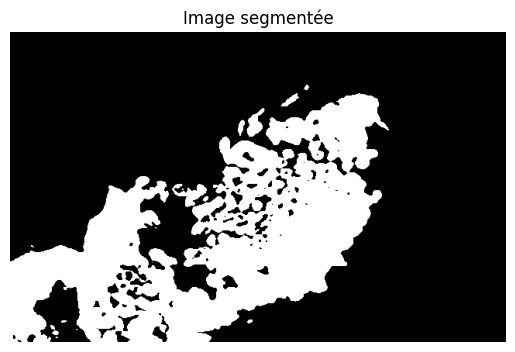

In [11]:
# Appliquer un seuil
_, binary_image = cv2.threshold(image_norm, 127, 255, cv2.THRESH_BINARY_INV)

# Visualisation
plt.imshow(binary_image, cmap='gray')
plt.title("Image segmentée")
plt.axis('off')
plt.show()


# Seuillage adaptatif

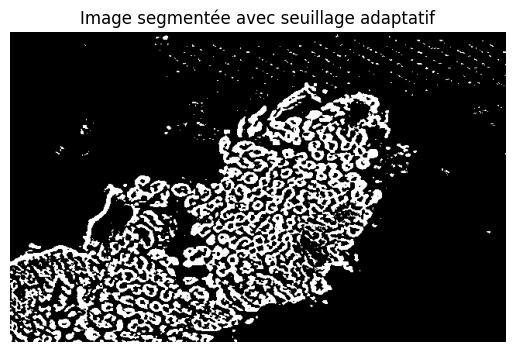

In [12]:
""" 
La méthode adaptiveThreshold applique un seuillage adaptatif à une image. Contrairement au seuillage 
global (comme cv2.threshold), où un seul seuil est utilisé pour toute l'image, le seuillage adaptatif 
calcule des seuils locaux pour différentes régions de l'image. Cela permet de traiter des images avec 
des variations d'éclairage ou des zones avec des contrastes différents.
 """

adaptive_thresh = cv2.adaptiveThreshold(
    image_norm, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Visualisation
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Image segmentée avec seuillage adaptatif")
plt.axis('off')
plt.show()


# Recherche des contours

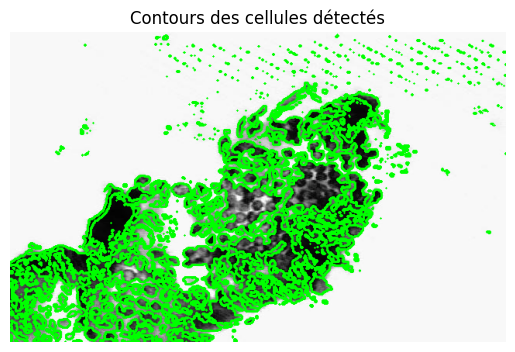

In [13]:
# Trouver les contours
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur une copie de l'image originale
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Visualisation
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Contours des cellules détectés")
plt.axis('off')
plt.show()


# Calcul des caractéristiques numériques

In [14]:
import numpy as np

features = []

for contour in contours:
    
    # Calculer l'aire
    area = cv2.contourArea(contour)
    
    # Calculer le périmètre
    perimeter = cv2.arcLength(contour, True)
    
    # Calculer la compacité
    compactness = (perimeter ** 2) / (4 * np.pi * area) if area > 0 else 0
    
    # Calculer le rayon moyen
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        center_x = int(moments['m10'] / moments['m00'])
        center_y = int(moments['m01'] / moments['m00'])
    else:
        center_x, center_y = 0, 0
    radius = np.sqrt(area / np.pi)

    # Ajouter les caractéristiques
    features.append({
        "Area": area,
        "Perimeter": perimeter,
        "Compactness": compactness,
        "Radius": radius,
        "Centroid": (center_x, center_y),
    })

# Afficher les 5 premières caractéristiques
for i, feat in enumerate(features[:5]):
    print(f"Cellule {i + 1}: {feat}")


Cellule 1: {'Area': 0.0, 'Perimeter': 0.0, 'Compactness': 0, 'Radius': 0.0, 'Centroid': (0, 0)}
Cellule 2: {'Area': 0.0, 'Perimeter': 2.0, 'Compactness': 0, 'Radius': 0.0, 'Centroid': (0, 0)}
Cellule 3: {'Area': 0.0, 'Perimeter': 0.0, 'Compactness': 0, 'Radius': 0.0, 'Centroid': (0, 0)}
Cellule 4: {'Area': 8.0, 'Perimeter': 31.656854152679443, 'Compactness': 9.968634198354843, 'Radius': 1.5957691216057308, 'Centroid': (161, 398)}
Cellule 5: {'Area': 4.0, 'Perimeter': 11.656854152679443, 'Compactness': 2.703291445613817, 'Radius': 1.1283791670955126, 'Centroid': (145, 398)}


# Calcul des caractéristiques texturales

In [15]:
def calculate_glcm_features(glcm):
    """
    Calcule les caractéristiques texturales à partir d'une matrice GLCM.
    
    Args:
        glcm (numpy.ndarray): Matrice de co-occurrence des niveaux de gris (GLCM).
        
    Returns:
        dict: Dictionnaire contenant les propriétés texturales.
    """
    features = {}
    
    # Contrast : Mesure de la variation des niveaux de gris
    features['Contrast'] = np.sum(
        [[(i - j) ** 2 * glcm[i, j] for i in range(glcm.shape[0])] for j in range(glcm.shape[1])]
    )
    
    # Dissimilarity : Moyenne des différences de niveaux de gris
    features['Dissimilarity'] = np.sum(
        [[abs(i - j) * glcm[i, j] for i in range(glcm.shape[0])] for j in range(glcm.shape[1])]
    )
    
    # Homogeneity : Mesure de la proximité des éléments diagonaux
    features['Homogeneity'] = np.sum(
        [[glcm[i, j] / (1 + abs(i - j)) for i in range(glcm.shape[0])] for j in range(glcm.shape[1])]
    )
    
    # Energy : Somme des carrés des valeurs (texture uniforme)
    features['Energy'] = np.sum(glcm ** 2)
    
    # Correlation : Mesure de la relation entre intensités
    i_indices, j_indices = np.indices(glcm.shape)
    i_mean = np.sum(i_indices * glcm)
    j_mean = np.sum(j_indices * glcm)
    i_std = np.sqrt(np.sum((i_indices - i_mean) ** 2 * glcm))
    j_std = np.sqrt(np.sum((j_indices - j_mean) ** 2 * glcm))
    features['Correlation'] = np.sum(
        ((i_indices - i_mean) * (j_indices - j_mean) * glcm) / (i_std * j_std + 1e-10)
    )
    
    return features


# Fonction Globale

In [30]:
import cv2
import numpy as np
import pandas as pd
import mahotas
from skimage.measure import regionprops, label

def extract_features(image_path):
    # Charger l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Étape 1 : Prétraitement de l'image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary = cv2.bitwise_not(binary)

    # Étape 2 : Détection des contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Liste pour stocker les caractéristiques pour chaque noyau
    nuclei_features = []

    for contour in contours:
        if cv2.contourArea(contour) < 50:  # Ignorer les petits artefacts
            continue
        
        # Calcul des caractéristiques géométriques
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        compactness = (perimeter**2) / (4 * np.pi * area) if area > 0 else 0
        radius = np.sqrt(area / np.pi) if area > 0 else 0
        M = cv2.moments(contour)
        centroid = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])) if M["m00"] != 0 else (0, 0)

        # Calcul de la symétrie
        bounding_box = cv2.boundingRect(contour)
        x, y, w, h = bounding_box
        symmetry = abs(w - h) / max(w, h)

        # Extraction de la ROI
        roi = image[y:y+h, x:x+w]
        roi_norm = (roi - np.min(roi)) / (np.max(roi) - np.min(roi) + 1e-6) * 255
        roi_norm = roi_norm.astype(np.uint8)

        # Caractéristiques texturales (Haralick avec mahotas)
        glcm = mahotas.features.texture.haralick(roi_norm)
        contrast = glcm[:, 0].mean()  # Haralick contrast
        dissimilarity = glcm[:, 1].mean()  # Haralick dissimilarity
        homogeneity = glcm[:, 2].mean()  # Haralick homogeneity
        energy = glcm[:, 4].mean()  # Haralick energy
        correlation = glcm[:, 5].mean()  # Haralick correlation

        # Dimension fractale (approximation du contour)
        hull = cv2.convexHull(contour)
        fractal_dimension = cv2.arcLength(hull, True) / perimeter if perimeter > 0 else 0

        # Stockage des caractéristiques
        nuclei_features.append({
            "Area": area,
            "Perimeter": perimeter,
            "Compactness": compactness,
            "Radius": radius,
            "Symmetry": symmetry,
            "Fractal Dimension": fractal_dimension,
            "Contrast": contrast,
            "Dissimilarity": dissimilarity,
            "Homogeneity": homogeneity,
            "Energy": energy,
            "Correlation": correlation
        })

    # Calcul des statistiques globales
    df_features = pd.DataFrame(nuclei_features)
    summary_features = {}

    for col in df_features.columns:
        summary_features[f"{col}_mean"] = df_features[col].mean()
        summary_features[f"{col}_se"] = df_features[col].std()
        summary_features[f"{col}_worst"] = df_features[col].max()

    return pd.DataFrame([summary_features])

# Exemple d'utilisation
image_path = "./Image2.jpeg"  # Remplacez par votre chemin d'image
df = extract_features(image_path)
print(df)



   Area_mean        Area_se  Area_worst  Perimeter_mean  Perimeter_se  \
0    89131.2  198813.782111    444780.0     1184.069114   2476.416665   

   Perimeter_worst  Compactness_mean  Compactness_se  Compactness_worst  \
0      5613.610506          3.005285        1.568695           5.638057   

   Radius_mean  ...  Dissimilarity_worst  Homogeneity_mean  Homogeneity_se  \
0    81.496709  ...          1964.036839          0.789466        0.146901   

   Homogeneity_worst  Energy_mean  Energy_se  Energy_worst  Correlation_mean  \
0            0.99929      0.30028   0.184557      0.626486         198.26123   

   Correlation_se  Correlation_worst  
0       41.999102         254.870915  

[1 rows x 33 columns]
